## Polynomial Regression on Boston Housing Dataset

**In this notebook we do a comparative study of Linear Regression and Polynomial Regression accuracy on the Boston Housing Dataset**

This data was originally a part of UCI Machine Learning Repository and has been removed now. This data also ships with the scikit-learn library. 
There are 506 samples and 13 feature variables in this data-set. The objective is to predict the value of prices of the house using the given features.

The description of all the features is given below:

  **CRIM**: Per capita crime rate by town

  **ZN**: Proportion of residential land zoned for lots over 25,000 sq. ft

  **INDUS**: Proportion of non-retail business acres per town

  **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

  **NOX**: Nitric oxide concentration (parts per 10 million)

  **RM**: Average number of rooms per dwelling

  **AGE**: Proportion of owner-occupied units built prior to 1940

  **DIS**: Weighted distances to five Boston employment centers

  **RAD**: Index of accessibility to radial highways

  **TAX**: Full-value property tax rate per $10,000

  **B**: 1000(Bk - 0.63)², where Bk is the proportion of [people of African American descent] by town

  **LSTAT**: Percentage of lower status of the population

  **MEDV**: Median value of owner-occupied homes in $1000s
  
  
  



I**mport the required Libraries**

In [52]:
import numpy as np
import pandas as pd
from sklearn import linear_model, metrics, model_selection
from sklearn.linear_model import ElasticNet as Raso
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
import seaborn as sns

**Load the data into pandas dataframe**

In [53]:
df = pd.read_csv(r"C:\Users\Victor\Desktop\Data2 - copia\3-Machine_Learning\1-Supervisado\1-Regression\2-Polynomial_Regression\ejercicios\data\Boston.csv",index_col=0)
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


**The target values is missing from the data. Create a new column of target values and add it to dataframe in a column called MEDV**

**Data preprocessing**

Check for missing values in all the columns

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 506 entries, 1 to 506
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 59.3 KB


In [55]:
# TODO NUMEROS!! NICE

In [56]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [57]:
# FIJAOS EN LAS MEDIAS...

**Data Visualization**

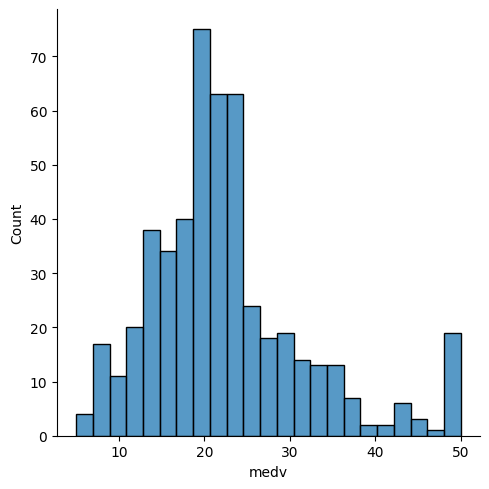

In [58]:
sns.displot(df.loc[:,"medv"])

In [59]:
# DISTPLOT DE SEABORN DE LA VARIABLE MEDV

**Correlation matrix**

Analyze the correlation matrix. Plot a heatmap

* From correlation plot: which are the columns that are more correlated with **MEDV**
* There are two features highly correlated. Identify them and drop one of them in order to avoid multi-colinearity

In [60]:
df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [61]:
# CORRELATION

<Axes: >

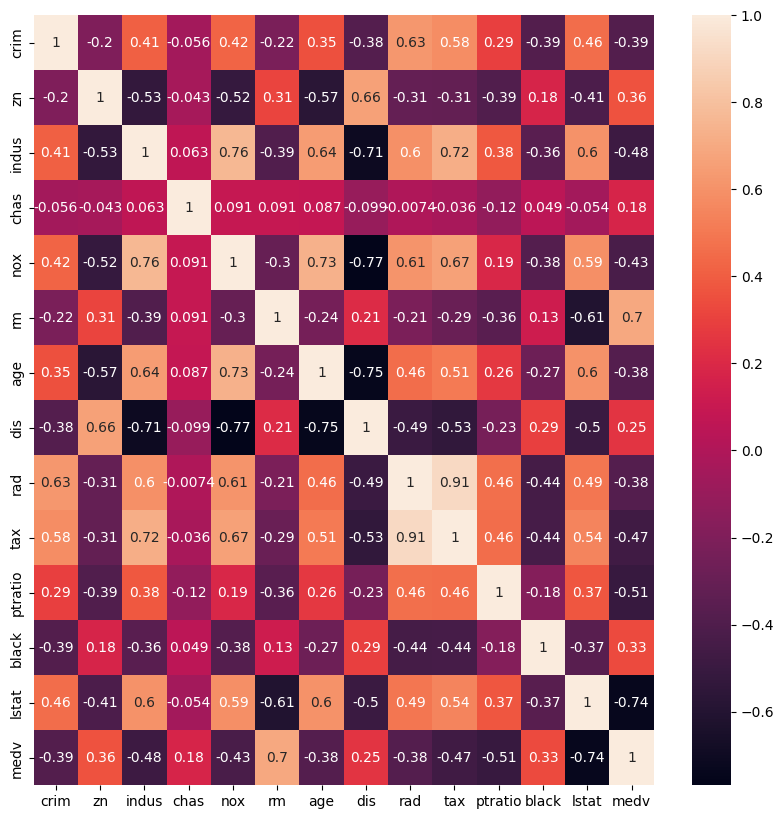

In [62]:
plt.figure(figsize=(10,10))

sns.heatmap(df.corr(), annot = True)

In [63]:
# HEATMAP BABY

In [64]:
# NOS CARGAMOS LA COLUMNA TAX PORQUE HAY MUCHA CORRELACION ENTRE RAD Y TAX

In [65]:
df1 = df.pop("tax")
df1

1      296
2      242
3      242
4      222
5      222
      ... 
502    273
503    273
504    273
505    273
506    273
Name: tax, Length: 506, dtype: int64

In [66]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,21.0,391.99,9.67,22.4
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,21.0,396.90,9.08,20.6
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,21.0,396.90,5.64,23.9
505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,21.0,393.45,6.48,22.0


### Draw 2 scatter plots to see the relationship between **MEDV** and **LSTAT** and **RM**

<Axes: xlabel='lstat', ylabel='medv'>

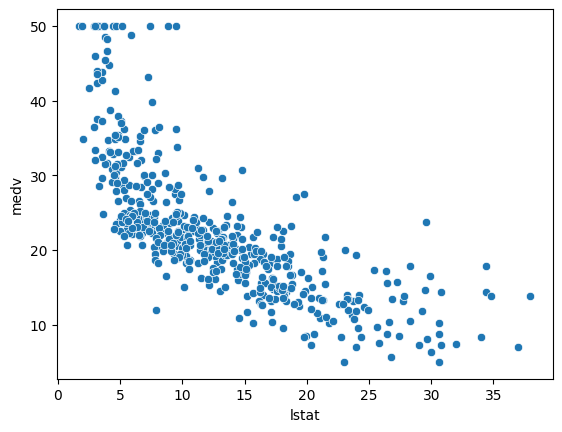

In [67]:
sns.scatterplot(x = df.loc[:,"lstat"] ,y = df.loc[:,"medv"])

<Axes: xlabel='rm', ylabel='medv'>

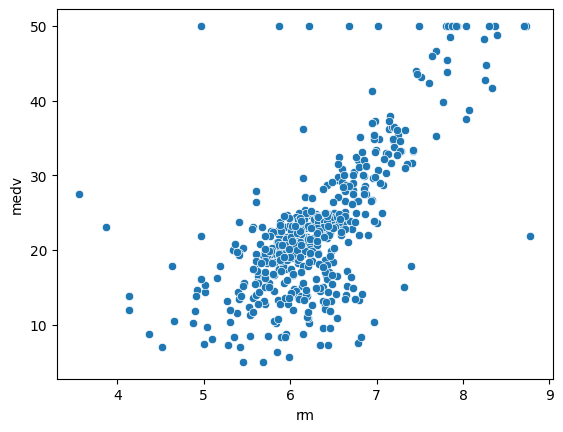

In [68]:
sns.scatterplot(x = df.loc[:,"rm"] ,y = df.loc[:,"medv"])

**Prepare the data for training**
Create a dataframe X including **LSTAT** and **RM** columns.
Y should be a pandas series including target values **'MEDV'**


In [69]:
# LAS X TIENEN DOS COLUMNAS, LAS Y SON UNA SERIE 
X = df.loc[:,["lstat","rm"]]
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 506 entries, 1 to 506
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   lstat   506 non-null    float64
 1   rm      506 non-null    float64
dtypes: float64(2)
memory usage: 11.9 KB


In [70]:
y = df.loc[:,"medv"]
y.info()

<class 'pandas.core.series.Series'>
Index: 506 entries, 1 to 506
Series name: medv
Non-Null Count  Dtype  
--------------  -----  
506 non-null    float64
dtypes: float64(1)
memory usage: 7.9 KB


**Split the data into training and testing sets**

Splits the training and test data set in 80% : 20%. Assign random_state to any value. This ensures consistency. Print the sahes of the resulting objects

In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2, random_state = 42)

In [72]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(404, 2)
(102, 2)
(404,)
(102,)


In [73]:
# Miramos el shape de as particiones

# **Linear Regression**

Build a linear regression model with sklearn LinearRegression.
We'll use Mean Squared error and R2 score to evaluate our model, so be sure to make the needed imports.

Import the necessary functions and train a LinearRegression model

In [74]:
# INSTANCIA DEL MODELO Y FIT
from sklearn.linear_model import LinearRegression

In [75]:
lr = LinearRegression()

In [76]:
lr.fit(X_train,y_train)

LinearRegression()

In [77]:
predictions = lr.predict(X_test)
predictions

array([25.50510964, 30.8592405 , 17.42725985, 25.81325491, 19.64929972,
       22.90317032, 16.88571841, 14.61917747, 22.06066668, 20.03326882,
       17.34725148, 18.15555053, -2.53419257, 22.41228621, 19.92807359,
       26.93027912, 17.16881388,  3.46139894, 37.31795503, 18.49325989,
       26.09287374, 27.0359285 , 13.08646469, 26.07395803, 19.05197872,
       14.34439003, 22.50507619, 21.09395936, 17.80756143, 18.90537548,
       17.3189494 , 26.72355799, 27.62430957, 19.01752219, 15.4809415 ,
       17.37191951, 32.8765884 , 22.03500171, 20.02675295, 25.5193256 ,
       12.24468569, 28.82657024, 38.2438306 , 18.45117927, 25.65604941,
       16.5588818 , 15.7090024 , 26.97797141, 19.55868547, 28.94200451,
       20.60534552, 31.33646277, 17.88508649, 28.36639373, 34.9844153 ,
       23.96269158, 19.65312104, 31.54864539, 24.99070281, 15.11477808,
       27.10508448, 32.73300584, 29.58795549, 18.58249363, 28.64129064,
       10.75991895, 20.69510169, 26.34948505, 29.46875554, 16.79

In [78]:
print("Train MSE:", metrics.mean_squared_error(y_train, lr.predict(X_train)))
print("Test MSE:", metrics.mean_squared_error(y_test, lr.predict(X_test))) 

Train MSE: 30.39185519321462
Test MSE: 31.243290601783627


In [79]:
lr.score(X_test,y_test)# esto equivale a un porcentual de acierto

0.5739577415025858

**Evaluate the model performance in the training and testing sets**

In [80]:
# OS DEJO ESTO PERO NO OS ACOSTUMBREIS, REPASAD VUESTROS NOMBRES DE VARIABLES
# METRICAS DE TRAIN, OJO SOLO PARA VER UN POCO EL OVERFIT, PERO LAS IMPORTANTES SON LAS DE TEST
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

print('MAE train', mean_absolute_error(y_train, lr.predict(X_train)))
print('MAPE train', mean_absolute_percentage_error(y_train, lr.predict(X_train)))
print('MSE train', mean_squared_error(y_train, lr.predict(X_train)))
print('RMSE train', np.sqrt(mean_squared_error(y_train, lr.predict(X_train))))
print('R2 score train', r2_score(y_train, lr.predict(X_train)))

MAE train 3.940490223422213
MAPE train 0.20798676056317758
MSE train 30.39185519321462
RMSE train 5.512880843371696
R2 score train 0.6501592679428922


In [81]:
# METRICAS DE TEST, LAS BUENAS, HACEOS LA PREGUNTA: QUE TAL LO ESTAMOS HACIENDO?
print('MAE test', mean_absolute_error(y_test, predictions))
print('MAPE test', mean_absolute_percentage_error(y_test, predictions))
print('MSE test', mean_squared_error(y_test, predictions))# si esto
print('RMSE test', np.sqrt(mean_squared_error(y_test, predictions)))# y esto se parece, fallo mucho, por poco, si no se parecen, fallo mucho, pocas veces
print('R2 score test', r2_score(y_test, predictions))# porcentual de aciertos

MAE test 3.898759721382358
MAPE test 0.20743640153704945
MSE test 31.243290601783627
RMSE test 5.589569804715174
R2 score test 0.5739577415025858


**Lets see the model performance visually. Let's plot y_test vs y_pred**

Plotting the y_test vs y_pred. Ideally should have been a straight line

<Axes: xlabel='medv'>

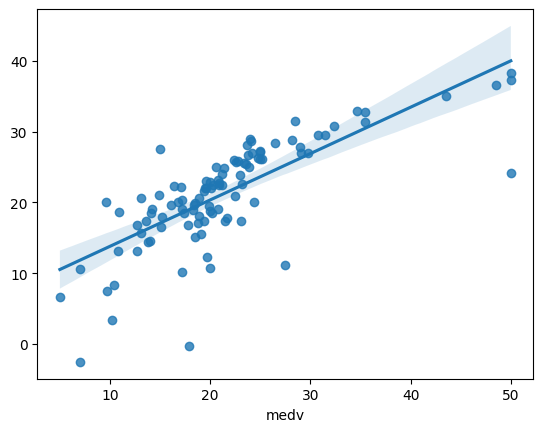

In [82]:
# ESTA OS LA DEJO POR QUE TODOS ODIAMOS ESTE PLOT
# y_pred = lr.predict(X_test)
sns.regplot(x = y_test, y = predictions)

# **Polynomial Regression**

We can see that **LSTAT** doesn't vary exactly in a linear way. Let's apply the Polynomial Regression with **degree 2** and test. 

To generate the higher order degrees, we use PolyniomialFeatures class from sklearn library. 

In [83]:
# FIT Y TRANSFORM DEL TRAIN CON POLYNOMIALFEATURES DE GRADO 2 Y ENTRENAMOS EL MODELO CON ESOS DATOS, LO LLAMAMOS pol_reg
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)# esto hace la elevación al cuadrado
poly_reg.fit(X_train)# aquí solo estamos transformando la X al cuadrado (siempre en función del valor de degree)
X_poly = poly_reg.transform(X_train)# definimos la nueva variable con las Xs transformadas
X_poly# esto son las Xs originales elevadas al cuadrado
poly_reg2 = LinearRegression()
poly_reg2.fit(X_poly,y_train)# hacemos la regresión lineal, ahora con las Xs al cuadrado

LinearRegression()

In [84]:
X_poly.shape

(404, 6)

**Did the model improve using the Polynomial model?**

In [85]:
poly_reg.fit(X_test)# aquí solo estamos transformando
X_poly2 = poly_reg.transform(X_test)
y_pred = poly_reg2.predict(X_poly2)

In [86]:
X_poly2.shape

(102, 6)

In [87]:
""" utilizamos ya la transformada de grado 2"""
print('MAE test', mean_absolute_error(y_test, y_pred))
print('MAPE test', mean_absolute_percentage_error(y_test,y_pred))
print('MSE test', mean_squared_error(y_test, y_pred))
print('RMSE test', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 score test', r2_score(y_test, y_pred))

MAE test 2.883346947360542
MAPE test 0.15958620425165265
MSE test 18.43377773911108
RMSE test 4.293457550635743
R2 score test 0.7486318454509433


MAE test 3.898759721382358
MAPE test 0.20743640153704945
MSE test 31.243290601783627
RMSE test 5.589569804715174
R2 score test 0.5739577415025858

In [88]:
print('MAE train', )
print('MAPE train', )
print('MSE train',)
print('RMSE train', )
print('R2 score train',)

MAE train
MAPE train
MSE train
RMSE train
R2 score train


In [89]:
# transformamos el test
X_poly_test = ###

SyntaxError: invalid syntax (3807085560.py, line 2)

In [ ]:
print('MAE test', )
print('MAPE test',)
print('MSE test',)
print('RMSE test', )
print('R2 score test', )

MAE test 2.8833469473605455
MAPE test 0.1595862042516529
MSE test 18.433777739111108
RMSE test 4.293457550635747
R2 score test 0.7486318454509429


In [ ]:
# FIT Y TRANSFORM DEL TRAIN CON POLYNOMIALFEATURES DE GRADO 2 Y ENTRENAMOS EL MODELO CON ESOS DATOS, LO LLAMAMOS pol_reg
from sklearn.preprocessing import PolynomialFeatures
poly_reg3 = PolynomialFeatures(degree = 3)# esto hace la elevación al cubo
poly_reg3.fit(X_train)# aquí solo estamos transformando la X al cubo (siempre en función del valor de degree)
X_poly3 = poly_reg3.transform(X_train)# definimos la nueva variable con las Xs transformadas
X_poly3# esto son las Xs originales elevadas al cubo
poly_reg31 = LinearRegression()
poly_reg31.fit(X_poly3,y_train)# hacemos la regresión lineal, ahora con las Xs al cubo

LinearRegression()

In [ ]:
poly_reg.fit(X_test)# aquí solo estamos transformando
X_poly2 = poly_reg.transform(X_test)
y_pred = poly_reg2.predict(X_poly2)

(102, 2)

In [91]:
""" GENERAMOS LAS PREDICCI0NES EN BASE AL MODELO YA ENTRENADO con las variables de test"""
X_poly4 = poly_reg3.transform(X_test)# variable para entrenar el modelo, viene de polinomial features
y_pred3 = poly_reg31.predict(X_poly4)# variable para calcular las ys de test, viene de la regresión lineal
y_pred3.shape

(102,)

In [93]:
y_test.shape

(102,)

In [92]:
""" calculamos los diferentes tipos de error"""
print('MAE train', mean_absolute_error(y_test, y_pred3))
print('MAPE train', mean_absolute_percentage_error(y_test, y_pred3))
print('MSE train', mean_squared_error(y_test, y_pred3))
print('RMSE train', np.sqrt(mean_squared_error(y_test, y_pred3)))
print('R2 score train', r2_score(y_test, y_pred3))

MAE train 3.175290731803397
MAPE train 0.17579447606610418
MSE train 36.11498300406481
RMSE train 6.009574278105298
R2 score train 0.5075259798732881


grado 2

MAE test 2.883346947360542
MAPE test 0.15958620425165265
MSE test 18.43377773911108
RMSE test 4.293457550635743
R2 score test 0.7486318454509433

In [25]:
# REPETIR CON POLINOMIO DE GRADO 3
poly_reg_3

MAE train 3.0707405886217547
MAPE train 0.15752199776527123
MSE train 18.996091524941168
RMSE train 4.358450587644785
R2 score train 0.7813359361230123
--------------------
MAE test 3.1752907318001657
MAPE test 0.17579447606540294
MSE test 36.1149830040547
RMSE test 6.0095742781044565
R2 score test 0.507525979873426


In [114]:
# FIT Y TRANSFORM DEL TRAIN CON POLYNOMIALFEATURES DE GRADO 2 Y ENTRENAMOS EL MODELO CON ESOS DATOS, LO LLAMAMOS pol_reg
from sklearn.preprocessing import PolynomialFeatures
poly_reg4 = PolynomialFeatures(degree = 4)# esto hace la elevación a 4
poly_reg4.fit(X_train)# aquí solo estamos transformando la X a 4 (siempre en función del valor de degree)
X_poly41 = poly_reg4.transform(X_train)# definimos la nueva variable con las Xs transformadas
X_poly# esto son las Xs originales elevadas a 4
poly_reg41 = LinearRegression()
poly_reg41.fit(X_poly41,y_train)# hacemos la regresión lineal, ahora con las Xs a 4

LinearRegression()

In [116]:
""" hacemos la tansformada de las Xs de test"""
poly_reg4.fit(X_test)# aquí solo estamos transformando
X_poly42 = poly_reg4.transform(X_test)
y_pred4 = poly_reg41.predict(X_poly42)
y_pred4.shape

(102,)

In [117]:
""" utilizamos ya la transformada de grado 2"""
print('MAE test', mean_absolute_error(y_test, y_pred4))
print('MAPE test', mean_absolute_percentage_error(y_test,y_pred4))
print('MSE test', mean_squared_error(y_test, y_pred4))
print('RMSE test', np.sqrt(mean_squared_error(y_test, y_pred4)))
print('R2 score test', r2_score(y_test, y_pred4))

MAE test 3.0921921934416274
MAPE test 0.17644726535834296
MSE test 36.48367314287131
RMSE test 6.040171615349295
R2 score test 0.5024984179104686


In [28]:
# REPETIR CON POLINOMIO DE GRADO 4
poly_reg_4

MAE train 3.8341530566422453
MAPE train 0.20617113668027295
MSE train 30.121340998753293
RMSE train 5.488291264023193
R2 score train 0.6532731576090722
--------------------
MAE test 448.9788659973031
MAPE test 59.621221591152654
MSE test 16288222.153952442
RMSE test 4035.866964352572
R2 score test -222109.75785280284


COMO EL POLY REG 4 OVERFITEA (Y MUCHO!!!) SACAMOS LAS VISUALIZACIONES PARA LOS RESULTADOS DE GRADO 3

OS LAS DEJO:

In [40]:
X_all_polly = poly_reg_3.transform(X)

c:\Users\josel\anaconda3\envs\new_basic_ds\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LSTAT'>

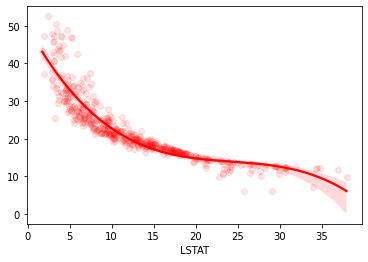

In [41]:

sns.regplot(X['LSTAT'], pol_reg_3.predict(X_all_polly), color='red', order=3, scatter_kws={"alpha":0.1})

c:\Users\josel\anaconda3\envs\new_basic_ds\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RM'>

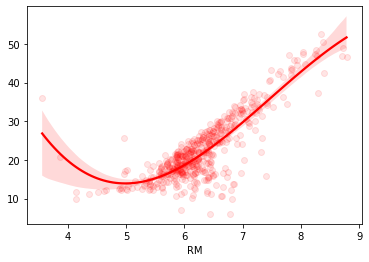

In [42]:

sns.regplot(X['RM'], pol_reg_3.predict(X_all_polly), color='red', order=3, scatter_kws={"alpha":0.1})